In [55]:
import matplotlib as mpl
import matplotlib.patches
import matplotlib.pyplot as plt
import networkx as nx 
import numpy
import numpy as np

with open('data2.csv', 'r') as f:
    rt_time = []
    for line in f:
        time= line.strip().split(',')[-1]
        #print (time)
        day = time[0:4] + time[5:7] + time[8:10]
        print (day)
       
        #hms= time[9:17].replace(':', '')
        hm = time[11:16].replace(':','')
        time = int(day + hm)
        print(time)

        rt_time.append(time)
#count the time lag
array = numpy.array(rt_time)
order = array.argsort()
ranks = order.argsort()
G = nx.DiGraph()

20151207
201512072238
20151208
201512081259
20151208
201512081259
20151209
201512091258


In [56]:
with open('data2.csv', 'r') as f:
    for position, line in enumerate(f):
        uid, rtuid= line.strip().split(',')[:-1]
        G.add_edge(uid, rtuid, time = ranks[position])
edges,colors = zip(*nx.get_edge_attributes(G,'time').items())
G = G.to_directed()
print(edges)
#degree=G.degree()#node's indegree and outdegree

degree = G.degree(G)
print(degree)
closenesss = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
print (G.number_of_edges()) # 1547
# print g.diameter(G) # 2
path_length = nx.all_pairs_shortest_path_length(G)
pos=nx.spring_layout(G) #set up a network
fig = plt.figure(figsize=(20, 10),facecolor='white')

(('name=aaa', 'name=bbb'), ('name=bbb', 'name=ccc'), ('name=bbb', 'name=eee'), ('name=ccc', 'name=ddd'))
{'name=aaa': 1, 'name=bbb': 3, 'name=ccc': 2, 'name=ddd': 1, 'name=eee': 1}
4


<Figure size 1440x720 with 0 Axes>

C:\Users\msy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\msy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\msy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\msy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\msy\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:13

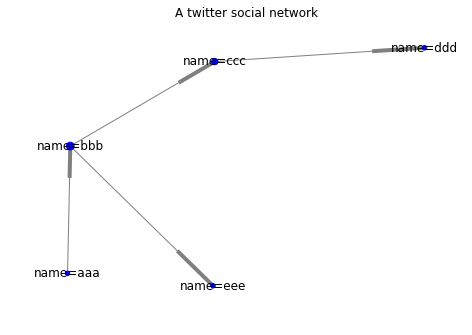

In [65]:
nx.draw(G, pos, nodelist = degree.keys(),
        node_size = [v*20 for v in degree.values()], node_color = 'blue',         
        node_shape = 'o', cmap=plt.cm.gray,
        edgelist = edges, edge_color = 'gray', width = 1.0,
        with_labels = True, arrows = True, arrowstyle='->')
plt.title("A twitter social network")
plt.show()